In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

Read Train data into a DataFrame

In [3]:
train_csv_file = "isl_wise_train_detail_03082015_v1.csv"
trains_df = pd.read_csv(train_csv_file)

Checking if the dataframe is loaded 

In [4]:
trains_df.sample(5)

,Train No.,train Name,islno,station Code,Station Name,Arrival time,Departure time,Distance,Source Station Code,source Station Name,Destination station Code,Destination Station Name
39943,'16537',NAGERCOIL EXP,5,SA,SALEM JN,'04:27:00','04:30:00',226,SBC,BANGALORE CY JN,NCJ,NAGERCOIL JN
15551,'12624',CHENNAI MAIL,20,KPD,KATPADI JN,'04:58:00','05:00:00',793,TVC,TRIVANDRUM CNTL,MAS,CHENNAI CENTRAL
57674,'22646',AHILYANAGARI EX,11,CKI,CHALAKUDI,'11:04:00','11:06:00',250,TVC,TRIVANDRUM CNTL,INDB,INDORE JN BG
67497,'59076',BSL ST BCT PASS,16,BLD,BHILAD,'00:17:00','00:19:00',441,BSL,BHUSAVAL JN,ST,SURAT
30474,'14660',JSM DLI EXPRESS,37,DEE,DELHI S ROHILLA,'10:46:00','10:48:00',916,JSM,JAISALMER,DLI,DELHI


In [5]:
trains_df.shape

(69006, 12)

Cleaning up data and converting formats for easier manipulation

In [6]:
def df_perform_action(df, cols, action):
    '''
    (df, cols, action) -> None
    Helper function that takes a DataFrame, cols list and performs
    the action specified
    '''
    for col in cols:
        df[col] = action(df, col)

# Remove the quotes around the string for the following cols
df_perform_action(
    trains_df, 
    ['Train No.', 'Arrival time','Departure time'], 
    lambda x,y:x[y].str.strip("'")
)

In [7]:
# Change the format to date time
# Convert the columns with time into datetime
df_perform_action(
    trains_df, 
    ['Arrival time','Departure time'], 
    lambda x,y:pd.to_datetime(x[y])
)

In [8]:
# Rename all the columns by replacing whitespace with '-' and stripping non-alphanumeric chars
col_names = trains_df.columns.tolist()
trains_df.columns = [col_name.lower().strip('\'.').replace(' ','-') for col_name in col_names]

In [9]:
trains_df.sample(5)

,train-no,train-name,islno,station-code,station-name,arrival-time,departure-time,distance,source-station-code,source-station-name,destination-station-code,destination-station-name
27248,13484,FARAKKA EXPRESS,19,AY,AYODHYA,2016-06-27 10:47:00,2016-06-27 10:49:00,643,DLI,DELHI,MLDT,MALDA TOWN
65699,57549,AURANGABAD PSGR,50,PDG,PARADGAON,2016-06-27 10:49:00,2016-06-27 10:50:00,482,HYB,HYDERABAD DECAN,AWB,AURANGABAD
32967,15159,SARNATH EXPRESS,46,DURG,DURG,2016-06-27 07:30:00,2016-06-27 00:00:00,1083,CPR,CHHAPRA,DURG,DURG
59307,22876,PRR KGP EXP,11,SLB,SALBONI,2016-06-27 14:43:00,2016-06-27 14:44:00,171,PRR,PURULIA JN,KGP,KHARAGPUR JN
30942,14723,KALINDI EXPRESS,24,SPZ,SAMPLA,2016-06-27 07:32:00,2016-06-27 07:34:00,534,CNB,KANPUR CENTRAL,BNW,BHIWANI


Data analysis part

In [10]:
"Total number of trains - %d" % len(trains_df['train-no'].unique())

'Total number of trains - 2810'

In [11]:
"Total number of Stations - %d" % len(trains_df['station-code'].unique())

'Total number of Stations - 4344'

In [12]:
# Distance travelled by all the trains in descending order
train_distances_df = trains_df[['train-no','train-name','distance', 'source-station-name', 'destination-station-name']] \
    .groupby(['train-no', 'train-name', 'source-station-name', 'destination-station-name']) \
    .sum() \
    .sort_values('distance' ,ascending=False).reset_index()
train_distances_df.head()

,train-no,train-name,source-station-name,destination-station-name,distance
0,16318,HIMSAGAR EXP,JAMMU TAWI,KANYAKUMARI,155675
1,15909,ABADH ASSAM EXP,NEW TINSUKIA JN,LALGARH JN,153688
2,13352,DHANBAD EXPRESS,ALLEPPEY,DHANBAD JN,149676
3,15906,VIVEK EXPRESS,DIBRUGARH,KANYAKUMARI,141633
4,16317,HIMSAGAR EXP,KANYAKUMARI,JAMMU TAWI,140642


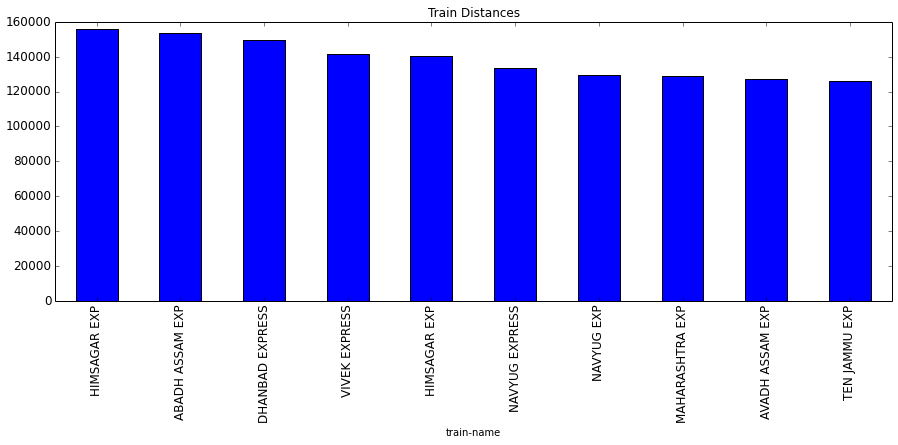

In [13]:
t_df = train_distances_df[['train-name', 'distance']].head(10)
s = pd.Series(t_df['distance'].tolist(), index=t_df['train-name'])

s.plot(
        kind='bar', 
        title ="Train Distances",
        figsize=(15,5),
        legend=False, 
        fontsize=12
    )

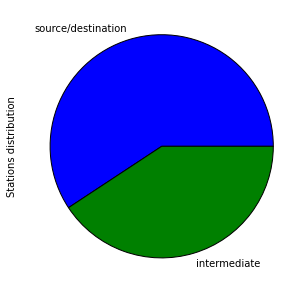

In [14]:
# Percentage of stations that are source/destination vs strictly intermediate
src_dest_station_codes = list(set(trains_df['source-station-code'].tolist() + trains_df['destination-station-code'].tolist()))
all_station_codes = trains_df['station-code'].tolist()
intermediate_station_codes = [i for i in all_station_codes if i not in src_dest_station_codes]

s = pd.Series(
    [len(all_station_codes), len(intermediate_station_codes)], 
    index=['source/destination', 'intermediate'],
    name="Stations distribution"
)
s.plot.pie(figsize=(5, 5))

In [ ]:
# Create a path for everything thats